# Support Vector Machine Problem 2

#### Task:
Prepare a classification model using SVM for salary data

#### Data description:
- age -- age of a person
- workclass	-- A work class is a grouping of work
- education	-- Education of an individuals
- maritalstatus -- Marital status of an individulas
- occupation	 -- occupation of an individuals
- relationship -- 	relationship of an individual
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week
- native -- Native of an individual
- Salary -- salary of an individual


In [35]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
raw_data_train = pd.read_csv("SalaryData_Train.csv")
raw_data_test = pd.read_csv("SalaryData_Test.csv")
raw_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df_train = raw_data_train.copy() #Changes we make in training data should be made to testing data as well
df_test = raw_data_test.copy()

In [38]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Feature Analysis

All features in the dataset can be used in model building.

In [39]:
for x in range(1,len(df_train.columns)):
    print(df_train.iloc[:,x].value_counts())
    print('\n')

#values given below reveal that there is very high bias involved in the dataset which needs to be rectified before modelling

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64


 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent   

In [40]:
df_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Label Encoding

In [41]:
df_train.columns.values


array(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'], dtype=object)

In [42]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [43]:
df_train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [44]:
from sklearn import preprocessing #Label Encoding
#label_encoder =
number = preprocessing.LabelEncoder()
for i in string_columns:
        df_train[i]= number.fit_transform(df_train[i])
        df_test[i]=number.fit_transform(df_test[i])
from sklearn import preprocessing


<Axes: >

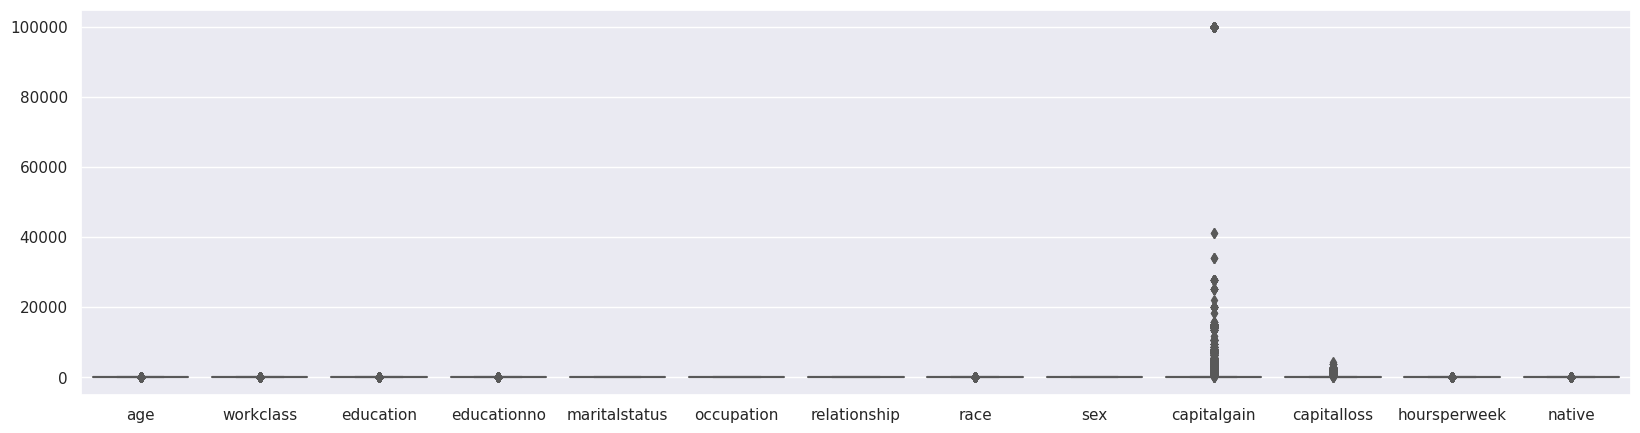

In [45]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df_train, orient="v", palette="Set2")
#There are outliers in the case of capital gain. But we cannot discard it

### Removing Bias in the Dataset

In [46]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df_train.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
m, n = smt.fit_resample(a, b)

#Count after
print(Counter(n)) #removed bias in dataset succefully
#SMOTEK method is very efficient but my local machine cannot process data fast enough.
#I have tried working with Google COlab but same issues there too. Processing time for modelling is very high
#Data takes too much time to process during mmodelling, therefore, we will try undersampling to speed up the modeling.

Counter({' <=50K': 22653, ' >50K': 7508})
Counter({' <=50K': 22262, ' >50K': 22262})


In [47]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Count before
print(Counter(b))

und = RandomUnderSampler()
m,n = und.fit_resample(a,b)

#Count after
print(Counter(n))

Counter({' <=50K': 22653, ' >50K': 7508})
Counter({' <=50K': 7508, ' >50K': 7508})


### Train | Split dataset
#### Original Dataset

In [48]:
X_train =m
X_test = df_test.iloc[:,:-1]
y_train = n
y_test = df_test.iloc[:,-1]

In [49]:
'''from sklearn.svm import SVC
model = SVC(kernel='linear', C=1000)
model.fit(X_train, y_train)
'''

"from sklearn.svm import SVC\nmodel = SVC(kernel='linear', C=1000)\nmodel.fit(X_train, y_train)\n"

#This took too much time to load

### Visualizing the data

This took too much time to load

Text(0.5, 1.0, 'T-Sine Visualization of Salary dataset')

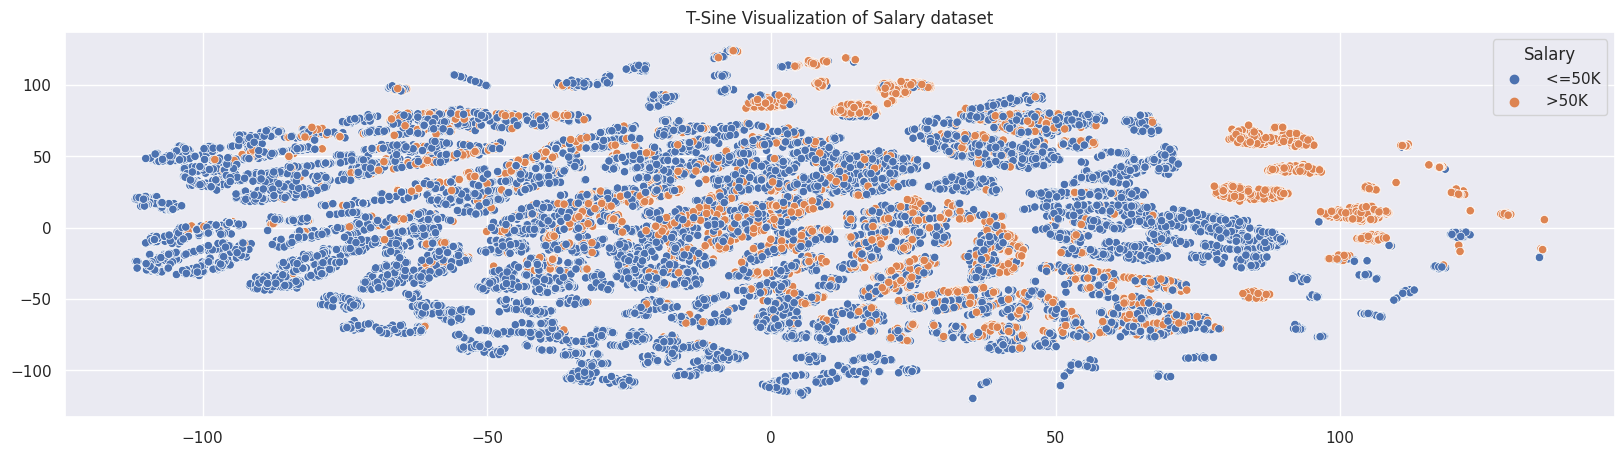

In [50]:
#Visualising the data via dimensionality reduction t-Sine Technique
from sklearn.manifold import TSNE

data_tsne_pca = TSNE(n_components=2).fit_transform(a)
sns.scatterplot(x=data_tsne_pca[:,0],y=data_tsne_pca[:,1],hue=b, palette="deep").set_title('T-Sine Visualization of Salary dataset')

## Support Vector Machine Model
This is taking too much time to model. I am not sure where it went wrong

- https://ai.stackexchange.com/questions/7202/why-does-training-an-svm-take-so-long-how-can-i-speed-it-up#:~:text=The%20most%20likely%20explanation%20is,entries%20over%20and%20over%20again.

- https://stackoverflow.com/questions/31681373/making-svm-run-faster-in-python

### Attempting a Bagging Classifier to boost the SVM

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [52]:
n_estimators = 10
model = OneVsRestClassifier(BaggingClassifier(LinearSVC(), max_samples=1.0 / n_estimators, n_estimators=n_estimators), n_jobs=-1)

In [53]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(estimator=LinearSVC(),
                                                max_samples=0.1),
                    n_jobs=-1)

### Model Evaluation Function

In [54]:
def confusion_matri(cf_matrix):
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')  # Use 'd' format for integer values
    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
def report_model(model):
    preds = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test,preds)
    print(cf_matrix)
    print(classification_report(y_test,preds))
    confusion_matri(cf_matrix)


[[8719 2641]
 [1144 2556]]
              precision    recall  f1-score   support

       <=50K       0.88      0.77      0.82     11360
        >50K       0.49      0.69      0.57      3700

    accuracy                           0.75     15060
   macro avg       0.69      0.73      0.70     15060
weighted avg       0.79      0.75      0.76     15060



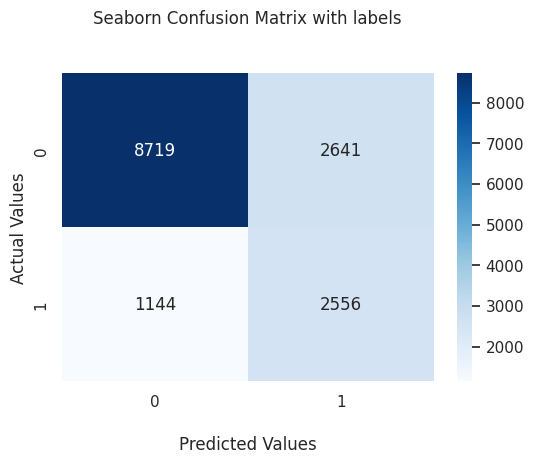

In [56]:
report_model(model) #Testing data is also biased.

In [57]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

<h3>Model using Grid Search CV</h3>

In [59]:
X_train =m
X_test = df_test.iloc[:,:-1]
y_train = n
y_test = df_test.iloc[:,-1]

In [60]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [61]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv = 5)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.604 total time=  30.2s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.615 total time=  30.2s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.605 total time=  28.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.605 total time=  28.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.606 total time=  28.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=  21.5s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.746 total time=  21.8s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time=  20.7s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.757 total time=  23.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.752 total time=  20.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   9.9s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}

In [63]:
grid_predictions=grid.predict(X_test)

[[8869 2491]
 [ 527 3173]]
              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85     11360
        >50K       0.56      0.86      0.68      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.82      0.77     15060
weighted avg       0.85      0.80      0.81     15060



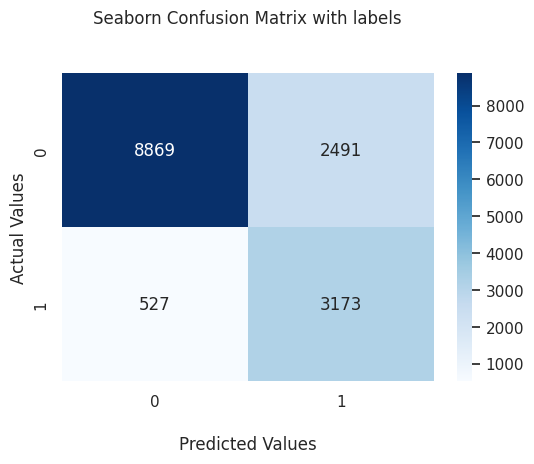

In [64]:
def report_model(model):
    preds = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test,preds)
    print(cf_matrix)
    print(classification_report(y_test,preds))
    confusion_matri(cf_matrix)
report_model(grid)


- EDA was perfomed on initial dataset and all errors were removed.
- Inbuilt databias of the dataset was rectified.
- UNABLE TO SPEED UP REGULAR SVM PROCESS.
- LinearSVC is not exactly Linear SVM. There are some variations.
- This classification methodology takes too much time and computing power.
- going with GridSearchCV i got 80% better model
- Random Forest is a much better alternative to SVM.